# Data Processing: Auxiliary Data
**CPI & Consumer Sentiment**
### Import Libraries & Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
apple_raw = pd.read_csv('./data/apple_raw.csv')
apple_raw['Date'] = pd.to_datetime(apple_raw['Date'])
apple_raw.set_index("Date", inplace=True)

apple_test = pd.read_csv('./data/apple_raw_test.csv')
apple_test['Date'] = pd.to_datetime(apple_test['Date'])
apple_test.set_index("Date", inplace=True)

## 1. CPI (Consumer Price Index)
### 1.1 Data Resample

In [3]:
def cpi_resample(df):
    cpi_raw = df
    cpi_raw['Date'] = pd.to_datetime(cpi_raw['Date'])
    cpi_raw.set_index("Date", inplace=True)
    cpi_raw = cpi_raw.resample('D').interpolate() # Up samping to every day
    return cpi_raw

df_cpi_raw = pd.read_csv('./data/data_CPI.csv')
cpi_raw = cpi_resample(df_cpi_raw)
all_cpi = apple_raw.join(cpi_raw) # Merge time series stock data and CPI data
cpi = all_cpi['CPI'] # Extract CPI data
cpi

Date
2017-04-03    244.537933
2017-04-04    244.544900
2017-04-05    244.551867
2017-04-06    244.558833
2017-04-07    244.565800
                 ...    
2021-04-26    268.838167
2021-04-27    268.909533
2021-04-28    268.980900
2021-04-29    269.052267
2021-04-30    269.123633
Name: CPI, Length: 1027, dtype: float64

In [4]:
df_cpi_test = pd.read_csv('./data/data_CPI_test.csv')
cpi_test = cpi_resample(df_cpi_test)
all_test_cpi = apple_test.join(cpi_test)

In [20]:
cpi.describe().T

count    1027.000000
mean      254.430461
std         5.734973
min       244.537933
25%       250.875967
50%       255.838133
75%       258.174750
max       269.123633
Name: CPI, dtype: float64

### 1.2 Data Clean

In [21]:
if cpi.isna().mean() == 0:
    print("There is no null value in the CPI data")

cpi.isna().mean()

There is no null value in the CPI data


0.0

z score of the dataset is:
 [1.72578784 1.72457248 1.72335712 ... 2.53837757 2.55082775 2.56327793]
There is no outliers in the time series stock data


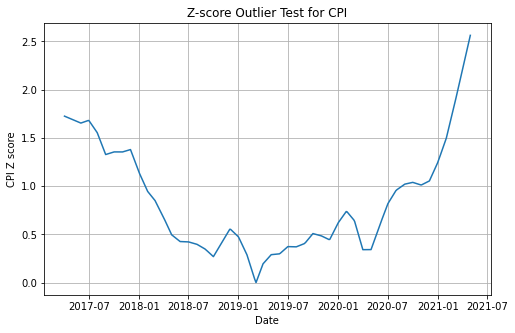

In [7]:
# Using Z-score to find outliers
from scipy import stats
z = np.abs(stats.zscore(cpi))

print('z score of the dataset is:\r\n',z)

plt.figure(figsize=(8, 5))
plt.plot(cpi.index, z)
plt.xlabel('Date')
plt.ylabel('CPI Z score')
plt.grid()
plt.title('Z-score Outlier Test for CPI')
plt.savefig('./pictures/Zscore_CPI.jpg')

# set a threshold and find the location where the value meets our condition(s)
threshold = 3
outlier_loc = np.where(z > threshold)
if len(outlier_loc) > 1:
    # find the outlier value given its index
    outlier_by_Z_Score = cpi.values[outlier_loc]
    print('the data classified as outlier by z score:\r\n', outlier_by_Z_Score)
    print('the date of the outlier is:\r\n', cpi.index[outlier_loc])
else:
    print("There is no outliers in the time series stock data")

### 1.3 Data Visualization

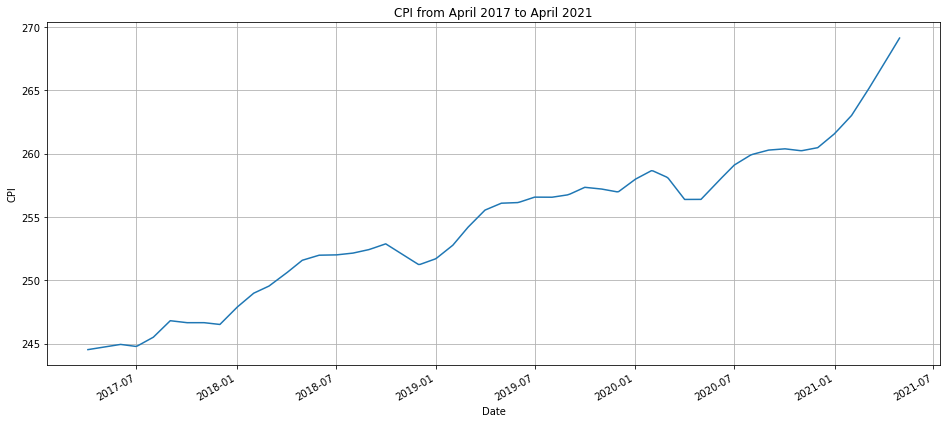

In [29]:
cpi.plot(figsize=(16, 7))
plt.xlabel('Date')
plt.ylabel('CPI')
plt.title('CPI from April 2017 to April 2021')
plt.grid()
plt.savefig('./pictures/CPI_overall.jpg')

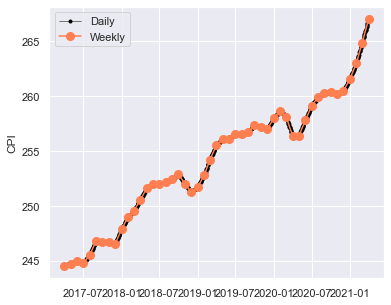

In [132]:
start, end = '2017-04-01', '2021-04-01' 
fig, ax = plt.subplots(figsize=(6, 5)) 

ax.plot(all_cpi.loc[start:end, 'CPI'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black') 
ax.plot(df_cpi_raw.loc[start:end, 'CPI'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
ax.set_ylabel("CPI") 
ax.legend()
plt.savefig('./pictures/CPI_resample.jpg')

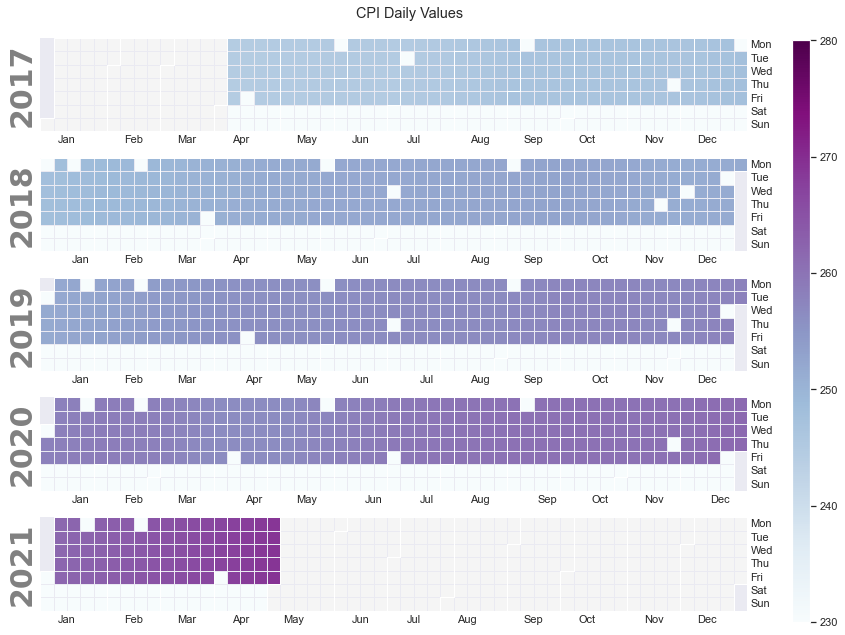

In [209]:
import calplot


calplot.calplot(all_cpi['CPI'], vmin=230, vmax=280, edgecolor=None, cmap='BuPu', 
                suptitle='CPI Daily Values', textfiller='-')
plt.savefig('./pictures/CPI_heatmap.jpg')

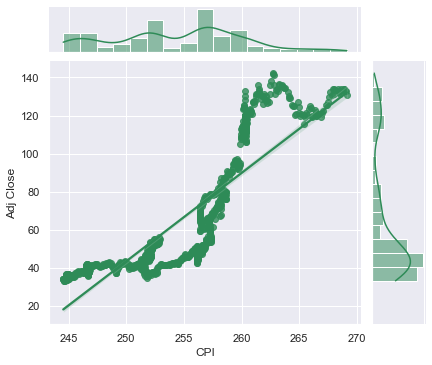

In [22]:
# sns.set(rc = {'figure.figsize':(10, 3)})
# plt.figure(figsize = (15,8))
sns.jointplot(x=cpi, y=apple_raw['Adj Close'], kind='reg', color='seagreen', height=7)
plt.gcf().set_size_inches(6, 5)
plt.xlabel('Date')
plt.ylabel('CPI')
# plt.title('CPI and stock price correlation')
plt.grid()
plt.savefig('./pictures/CPI_correlation.jpg')

### 1.4 Data Transformation
Do the normailzation of output data, using Min-Max scaling in sklearn to implement it.

In [99]:
cpi_col = all_cpi.filter(['CPI'])
# Convert the dataframe to a numpy array
cpi_val = cpi_col.values

# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_cpi = scaler.fit_transform(cpi_val)
print("The scaled data are:\r\n", scaled_cpi)

The scaled data are:
 [[0.00000000e+00]
 [2.83362551e-04]
 [5.66725102e-04]
 ...
 [9.94194457e-01]
 [9.97097229e-01]
 [1.00000000e+00]]


## 2. Consumer Sentiment
### 2.1 Data Resample

In [148]:
def sentiment_resample(df):
    sentiment_raw = df
    # sentiment_raw['Date'] = pd.to_datetime(sentiment_raw['Date'])
    # sentiment_raw.set_index("Date", inplace=True)
    sentiment_raw = sentiment_raw.resample('D').interpolate() # Up samping to every day
    return sentiment_raw

df_sent_raw = pd.read_csv('./data/data_sentiment.csv', parse_dates=True, index_col = "Date")
sentiment_raw = sentiment_resample(df_sent_raw)
all_sentiment = all_cpi.join(sentiment_raw) # Merge time series stock data and CPI data
sentiment = all_sentiment['Sentiment'] # Extract CPI data
sentiment

Date
2017-04-03    97.006667
2017-04-04    97.010000
2017-04-05    97.013333
2017-04-06    97.016667
2017-04-07    97.020000
                ...    
2021-04-26    83.800000
2021-04-27    83.620000
2021-04-28    83.440000
2021-04-29    83.260000
2021-04-30    83.080000
Name: Sentiment, Length: 1027, dtype: float64

In [9]:
df_sent_test = pd.read_csv('./data/data_sentiment_test.csv')
sent_test = sentiment_resample(df_sent_test)
all_test = all_test_cpi.join(sent_test)

In [63]:
sentiment.describe()

count    1027.000000
mean       91.857586
std         8.834363
min        71.800000
25%        85.034839
50%        96.141935
75%        98.208065
max       101.400000
Name: Sentiment, dtype: float64

### 2.2 Data Clean

In [64]:
if sentiment.isna().mean() == 0:
    print("There is no null value in the CPI data")

sentiment.isna().mean()

There is no null value in the CPI data


0.0

z score of the dataset is:
 [0.58313084 0.58350834 0.58388584 ... 0.95328735 0.97367226 0.99405717]
There is no outliers in the time series stock data


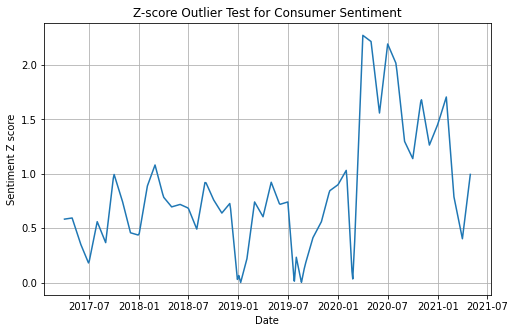

In [10]:
# Using Z-score to find outliers
from scipy import stats
z = np.abs(stats.zscore(sentiment))

print('z score of the dataset is:\r\n',z)

plt.figure(figsize=(8, 5))
plt.plot(sentiment.index, z)
plt.xlabel('Date')
plt.ylabel('Sentiment Z score')
plt.grid()
plt.title('Z-score Outlier Test for Consumer Sentiment')
plt.savefig('./pictures/Zscore_sentiment.jpg')

# set a threshold and find the location where the value meets our condition(s)
threshold = 3
outlier_loc = np.where(z > threshold)
if len(outlier_loc) > 1:
    # find the outlier value given its index
    outlier_by_Z_Score = sentiment.values[outlier_loc]
    print('the data classified as outlier by z score:\r\n', outlier_by_Z_Score)
    print('the date of the outlier is:\r\n', sentiment.index[outlier_loc])
else:
    print("There is no outliers in the time series stock data")

### 2.3 Data Visualization

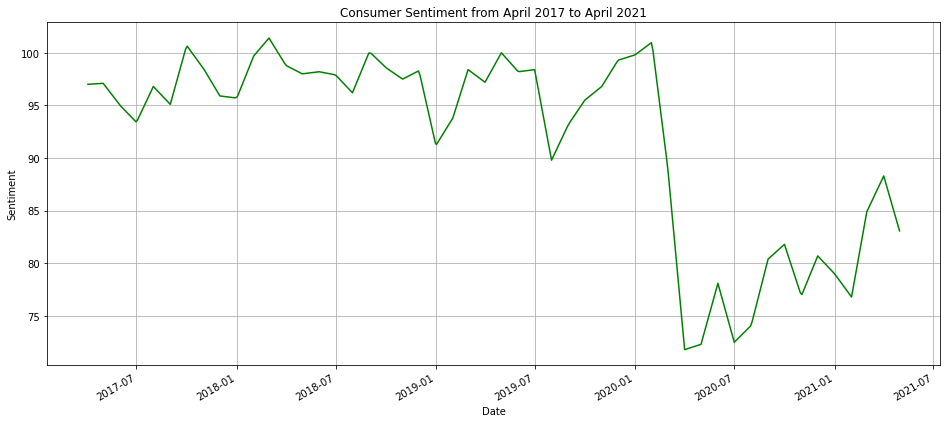

In [68]:
sentiment.plot(figsize=(16, 7), c='g')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Consumer Sentiment from April 2017 to April 2021')
plt.grid()
plt.savefig('./pictures/Sentiment_overall.jpg')

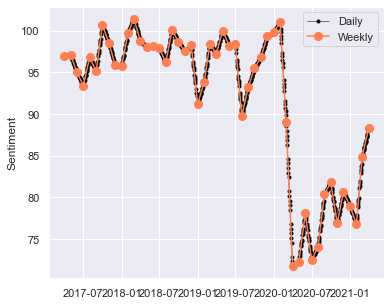

In [133]:
start, end = '2017-04-01', '2021-04-01' 
fig, ax = plt.subplots(figsize=(6, 5)) 
 
all_sentiment['Sentiment']

ax.plot(all_sentiment.loc[start:end, 'Sentiment'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black') 
ax.plot(df_sent_raw.loc[start:end, 'Sentiment'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
ax.set_ylabel("Sentiment") 
ax.legend()
plt.savefig('./pictures/Sentiment_resample.jpg')

In [149]:
all_sentiment

,High,Low,Open,Close,Volume,Adj Close,CPI,Sentiment
Date,,,,,,,,
2017-04-03,36.029999,35.762501,35.927502,35.924999,79942800.0,33.962158,244.537933,97.006667
2017-04-04,36.222500,35.792500,35.812500,36.192501,79565600.0,34.215042,244.544900,97.010000
2017-04-05,36.365002,35.952499,36.055000,36.005001,110871600.0,34.037785,244.551867,97.013333
2017-04-06,36.130001,35.862499,36.072498,35.915001,84596000.0,33.952713,244.558833,97.016667
2017-04-07,36.044998,35.817501,35.932499,35.834999,66688800.0,33.877071,244.565800,97.020000
...,...,...,...,...,...,...,...,...
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.094650,268.838167,83.800000
2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,133.766174,268.909533,83.620000
2021-04-28,135.020004,133.080002,134.309998,133.580002,107760100.0,132.959946,268.980900,83.440000


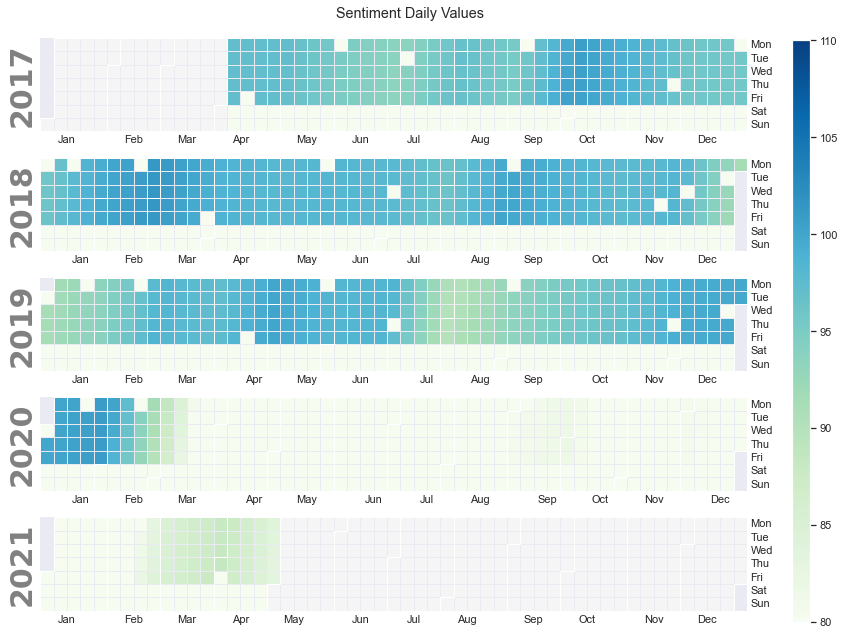

In [211]:
import calplot

calplot.calplot(all_sentiment['Sentiment'], vmin=80, vmax=110, edgecolor=None, cmap='GnBu',
                suptitle='Sentiment Daily Values', textfiller='-')
plt.savefig('./pictures/Sentiment_heatmap.jpg')

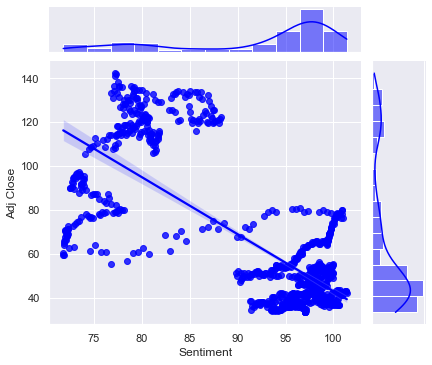

In [21]:
sns.jointplot(x=sentiment, y=apple_raw['Adj Close'], kind='reg', color='blue', height=7)
plt.gcf().set_size_inches(6, 5)
plt.xlabel('Date')
plt.ylabel('Sentiment')
# plt.title('Consumer sentiment and stock price correlation')
plt.grid()
plt.savefig('./pictures/sentiment_correlation.jpg')

### 2.4 Data Transformation
Do the normailzation of output data, using Min-Max scaling in sklearn to implement it.

In [93]:
sentiment_col = all_sentiment.filter(['Sentiment'])
# Convert the dataframe to a numpy array
sentiment_val = sentiment_col.values


# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_sentiment = scaler.fit_transform(sentiment_val)
print("The scaled data are:\r\n", scaled_sentiment)

The scaled data are:
 [[0.85157658]
 [0.85168919]
 [0.8518018 ]
 ...
 [0.39324324]
 [0.38716216]
 [0.38108108]]


In [104]:
# Create a new dataframe with only the 'Adj Close column'
adj_close = apple_raw.filter(['Adj Close'])
# Convert the dataframe to a numpy array
stock = adj_close.values

# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(stock)
print("The scaled data are:\r\n", scaled_data)

The scaled data are:
 [[0.00654605]
 [0.00886535]
 [0.00723965]
 ...
 [0.91449564]
 [0.91358264]
 [0.89514255]]


In [105]:
y = [scaled_data, scaled_cpi, scaled_sentiment]
scaled_data = np.swapaxes(scaled_data, 0, 1)
scaled_data = scaled_data.flatten()
scaled_data

scaled_cpi = np.swapaxes(scaled_cpi, 0, 1)
scaled_cpi = scaled_cpi.flatten()
scaled_cpi

scaled_sentiment = np.swapaxes(scaled_sentiment, 0, 1)
scaled_sentiment = scaled_sentiment.flatten()
scaled_sentiment


array([0.00654605, 0.00886535, 0.00723965, ..., 0.91449564, 0.91358264,
       0.89514255])

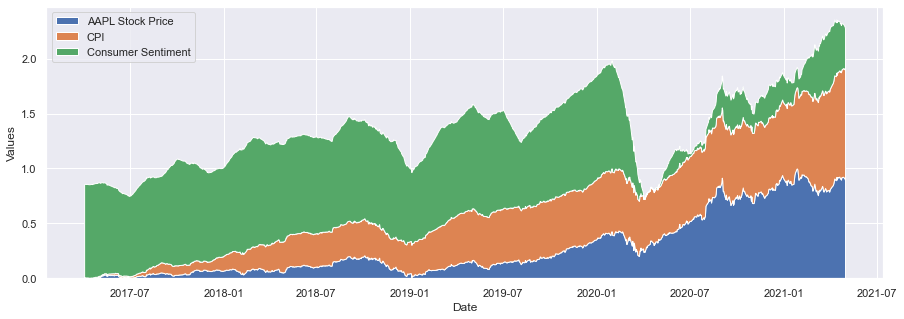

<Figure size 720x216 with 0 Axes>

In [127]:
# pal = sns.color_palette("Set2")
plt.figure(figsize=(15, 5))
plt.stackplot(adj_close.index.values, scaled_data, scaled_cpi, scaled_sentiment,
              labels=['AAPL Stock Price','CPI','Consumer Sentiment'])
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(loc='upper left')
plt.show()
plt.savefig('./pictures/normalization.jpg')

## 3. Data Integration

In [6]:
all_sentiment.to_csv("./data/data_all.csv", date_format = "%Y-%m-%d", index = True)
all_sentiment

,High,Low,Open,Close,Volume,Adj Close,CPI,Sentiment
Date,,,,,,,,
2017-04-03,36.029999,35.762501,35.927502,35.924999,79942800.0,33.962162,244.537933,97.006667
2017-04-04,36.222500,35.792500,35.812500,36.192501,79565600.0,34.215046,244.544900,97.010000
2017-04-05,36.365002,35.952499,36.055000,36.005001,110871600.0,34.037792,244.551867,97.013333
2017-04-06,36.130001,35.862499,36.072498,35.915001,84596000.0,33.952705,244.558833,97.016667
2017-04-07,36.044998,35.817501,35.932499,35.834999,66688800.0,33.877068,244.565800,97.020000
...,...,...,...,...,...,...,...,...
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.094650,268.838167,83.800000
2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,133.766190,268.909533,83.620000
2021-04-28,135.020004,133.080002,134.309998,133.580002,107760100.0,132.959946,268.980900,83.440000


In [21]:
all_test.to_csv("./data/data_all_test.csv", date_format = "%Y-%m-%d", index = True)
all_test

,High,Low,Open,Close,Volume,Adj Close,CPI,Sentiment
Date,,,,,,,,
2021-05-03,134.070007,131.830002,132.039993,132.539993,75135100.0,131.924744,269.356355,83.067742
2021-05-04,131.490005,126.699997,131.190002,127.849998,137564700.0,127.256538,269.437032,83.151613
2021-05-05,130.449997,127.970001,129.199997,128.100006,84000900.0,127.505386,269.517710,83.235484
2021-05-06,129.750000,127.129997,127.889999,129.740005,78128300.0,129.137772,269.598387,83.319355
2021-05-07,131.259995,129.479996,130.850006,130.210007,78973300.0,129.825729,269.679065,83.403226
2021-05-10,129.539993,126.809998,129.410004,126.849998,88071200.0,126.475647,269.921097,83.654839
2021-05-11,126.269997,122.769997,123.500000,125.910004,126142800.0,125.538422,270.001774,83.738710
2021-05-12,124.639999,122.250000,123.400002,122.769997,112172300.0,122.407684,270.082452,83.822581
2021-05-13,126.150002,124.260002,124.580002,124.970001,105861300.0,124.601196,270.163129,83.906452


In [7]:
all_sentiment.describe().T

,count,mean,std,min,25%,50%,75%,max
High,1027.0,6.605401e+01,3.118845e+01,3.547000e+01,4.348250e+01,5.179000e+01,7.984375e+01,1.450900e+02
Low,1027.0,6.457573e+01,3.021979e+01,3.501500e+01,4.273375e+01,5.087500e+01,7.834000e+01,1.413700e+02
Open,1027.0,6.531713e+01,3.076197e+01,3.530500e+01,4.309625e+01,5.114750e+01,7.905125e+01,1.436000e+02
Close,1027.0,6.534516e+01,3.071534e+01,3.517000e+01,4.307000e+01,5.132000e+01,7.922625e+01,1.431600e+02
Volume,1027.0,1.278808e+08,5.747164e+07,4.544800e+07,8.828600e+07,1.119123e+08,1.504132e+08,4.265100e+08
Adj Close,1027.0,6.405021e+01,3.104893e+01,3.324842e+01,4.148573e+01,5.003397e+01,7.826125e+01,1.422829e+02
CPI,1027.0,2.544305e+02,5.734973e+00,2.445379e+02,2.508760e+02,2.558381e+02,2.581747e+02,2.691236e+02
Sentiment,1027.0,9.185759e+01,8.834363e+00,7.180000e+01,8.503484e+01,9.614194e+01,9.820806e+01,1.014000e+02
